In [1]:
import sys
import os
import pandas as pd
sys.path.append('../')
import json
import random

from utils import multiclass_regression_utils
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor


%load_ext autoreload
%autoreload 2

2024-12-22 13:41:24.835525: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
save_resuts_folder = 'results/results_v3.2'

if not os.path.exists(save_resuts_folder):
    os.makedirs(save_resuts_folder)

In [16]:
# Data files

CHROMA_FIT_data = "../multiclass_classification/training_data/v2/CHROMA-FIT_data.json"
CHROMA_FIT_CSEC_data = "../multiclass_classification/training_data/v2/CHROMA-FIT_CSEC_data.json"
CHROMA_FIT_exposure_color_correction_data = "../multiclass_classification/training_data/v2/CHROMA-FIT_exposure_color_correction_data.json"

MST_data = "../multiclass_classification/training_data/v2/MST_data.json"
MST_CSEC_data = "../multiclass_classification/training_data/v2/MST_CSEC_data.json"
MST_exposure_color_correction_data = "../multiclass_classification/training_data/v2/MST_exposure_color_correction_data.json"

nr_of_test_images = 64

In [17]:
# Experiments

all_data = {

    # splits
    "CHROMA_FIT_data": multiclass_regression_utils.prepare_data_with_split(CHROMA_FIT_data),
    "CHROMA_FIT_CSEC_data": multiclass_regression_utils.prepare_data_with_split(CHROMA_FIT_CSEC_data),
    "CHROMA_FIT_exposure_color_correction_data": multiclass_regression_utils.prepare_data_with_split(CHROMA_FIT_exposure_color_correction_data),

    # original
    "CHROMA_FIT_data_original": multiclass_regression_utils.prepare_data_two_sources(CHROMA_FIT_data, CHROMA_FIT_data),
    "CHROMA_FIT_CSEC_data_original": multiclass_regression_utils.prepare_data_two_sources(CHROMA_FIT_CSEC_data, CHROMA_FIT_data),
    "CHROMA_FIT_exposure_color_correction_data_original": multiclass_regression_utils.prepare_data_two_sources(CHROMA_FIT_exposure_color_correction_data, CHROMA_FIT_data),

    # MST original
    "CHROMA_FIT_data_MST_original": multiclass_regression_utils.prepare_data_two_sources(CHROMA_FIT_data, MST_data),
    "CHROMA_FIT_CSEC_data_MST_original": multiclass_regression_utils.prepare_data_two_sources(CHROMA_FIT_CSEC_data, MST_data),
    "CHROMA_FIT_exposure_color_correction_data_MST_original": multiclass_regression_utils.prepare_data_two_sources(CHROMA_FIT_exposure_color_correction_data, MST_data),

    # MST splits
    "CHROMA_FIT_data_MST": multiclass_regression_utils.prepare_data_two_sources(CHROMA_FIT_data, MST_data),
    "CHROMA_FIT_CSEC_data_MST": multiclass_regression_utils.prepare_data_two_sources(CHROMA_FIT_CSEC_data, MST_CSEC_data),
    "CHROMA_FIT_exposure_color_correction_data_MST": multiclass_regression_utils.prepare_data_two_sources(CHROMA_FIT_exposure_color_correction_data, MST_exposure_color_correction_data),

}


Outliers detected: 6
Remaining samples: 312


Outliers detected: 4
Remaining samples: 314
Outliers detected: 17
Remaining samples: 270
Outliers detected: 6
Remaining samples: 312
Outliers detected: 6
Remaining samples: 312
Outliers detected: 4
Remaining samples: 314
Outliers detected: 6
Remaining samples: 312
Outliers detected: 17
Remaining samples: 270
Outliers detected: 6
Remaining samples: 312
Outliers detected: 6
Remaining samples: 312
Outliers detected: 1
Remaining samples: 340
Outliers detected: 4
Remaining samples: 314
Outliers detected: 1
Remaining samples: 340
Outliers detected: 17
Remaining samples: 270
Outliers detected: 1
Remaining samples: 340
Outliers detected: 6
Remaining samples: 312
Outliers detected: 1
Remaining samples: 340
Outliers detected: 4
Remaining samples: 314
Outliers detected: 24
Remaining samples: 317
Outliers detected: 17
Remaining samples: 270
Outliers detected: 12
Remaining samples: 316


CHROMA_FIT_data


/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
35/35/step - accuracy: 0.2356 - loss: 2.4885━━━━━━━━━━━━━━━━━━━35/35tep - accuracy: 0.2229 - loss: 2.53230s33/35━━ 10ms/step - accuracy: 0.1484 - loss: 2.787 11ms/step - accuracy: 0.1441 - loss: 2.8470 ━━━━━━━━━━━━━━━━━━━━━━ ━━━━━━━━━━━━━━━━━━━━━  ━━━━━━━━━━━━━━━━━0  0s 15ms/step - accuracy: 0.1418 - loss: 2.8437 8/350s  17ms/step - accuracy: 0.1413 - loss: 2.8532━━━━━━━━━━━━━━━━━━━ 0s  9/35 16ms/step - accuracy: 0.1410 - loss: 2.82570s  16ms/step - accuracy: 0.1434 - loss: 2.8089━━━11/3510/3512/3514/350s13/35    16ms/step - accuracy: 0.1475 - loss: 2.7904━━━━━━━━━━━━━━ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ ━━━━━━━━━━━━━ ━━━━━━━━━━━━━━━━━━━━━━0s 0s 0s 16ms/step - accuracy: 0.1637 - loss: 2.732817/35 15ms/step - accuracy: 0.1685 - loss: 2.7160━━━━━━━━━ 14ms/step - accuracy: 0.1730 - loss: 2.7001 16ms/step - accuracy: 0.1528 - loss: 2.75160s  16ms/step - accuracy: 0.1577 - loss: 2.7328━━━━━━━━━━━ 14ms/step - accuracy: 0.1776 - loss: 2.684━━━━━━━━━━━ 18/350s    ━━━━━━━━━━━0s━━━━━━━

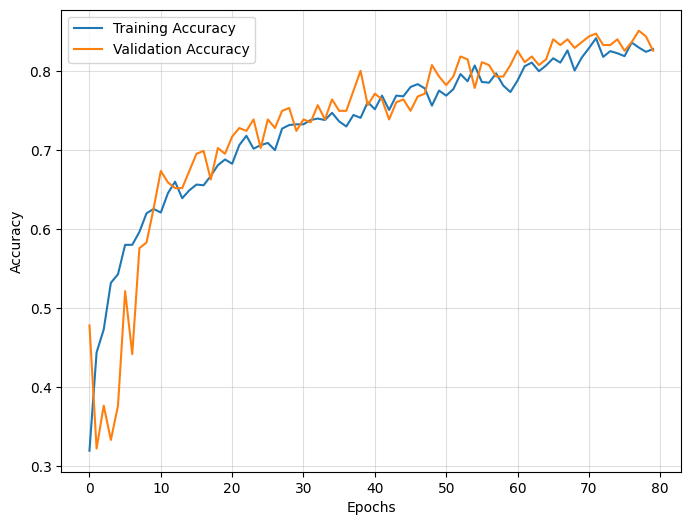

Training and Validation Loss


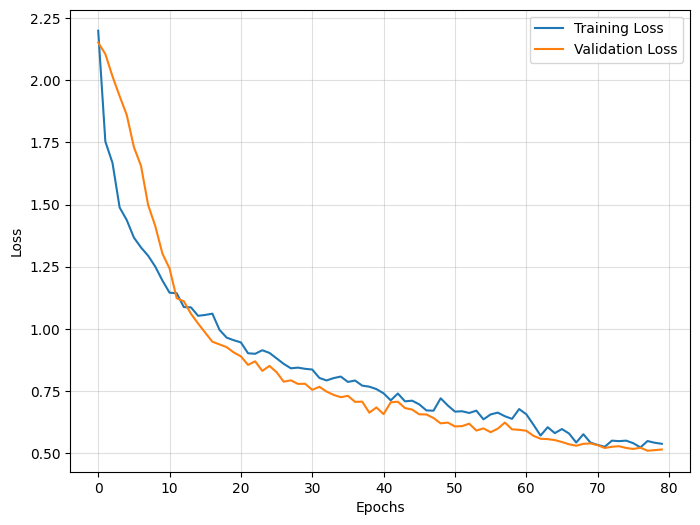

CHROMA_FIT_CSEC_data


/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
35/353/35 ━━━━━━━━━━━ accuracy: 0.1815 - loss: 2.7019 ━━━━━━━━━━━━━━━━━━0s27/355━━━━━━━━━━━━━━━━━━━ ━━  ━━━━━━━━━━━━━━━━━━━   0s━━━━━━━━━━━━━━━━━━━━ 3ms/step - accuracy: 0.1016 - loss: 3.24260s0s 3ms/step - accuracy: 0.1198 - loss: 3.1726 5ms/step - accuracy: 0.1266 - loss: 3.0791 6/11/13/35━━━━━━━━━━━━━━━━━━━━━━  ━━━━━━━━0s17/35 5ms/step - accuracy: 0.1272 - loss: 3.0483  ━━━━━━━━  ━━━━━━━━━━━━0s 7ms/step - accuracy: 0.1354 - loss: 2.93290s━━━━━━━━━━━━━━━━━━━━━ 6ms/step - accuracy: 0.1430 - loss: 2.8705━━━━━━━━━  6ms/step - accuracy: 0.1395 - loss: 2.8984━━━━━━━━━━ 6ms/step - accuracy: 0.1453 - loss: 2.84150s 6ms/step - accuracy: 0.1482 - loss: 2.8415   6ms/step - accuracy: 0.1547 - loss: 2.8141━━━━━━━ 19/0s20/35   6ms/step - accuracy: 0.1516 - loss: 2.8141━━━━━━━━━━ 7ms/step - accuracy: 0.1580 - loss: 2━━━━━━━━23/35     ━━━━━━━25/35━━━━━━━ 7ms/step - accuracy: 0.1672 - loss: 2.7608━━━━━━━━0s ━━━━━━━━━━━━━26/35  0s 7ms/step - accuracy: 0.1642 - loss: 2.7608  7ms/step - accu

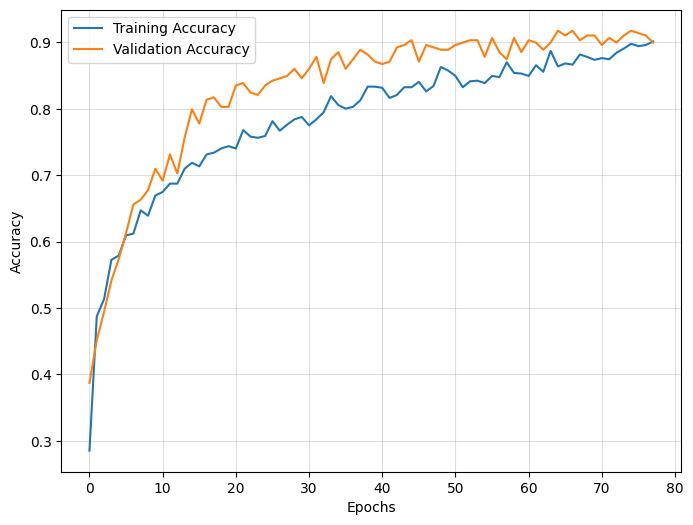

Training and Validation Loss


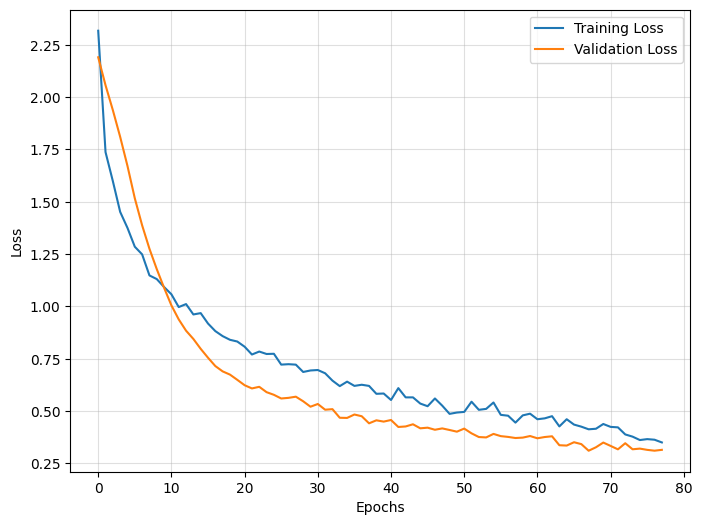

CHROMA_FIT_exposure_color_correction_data


/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
26/26step - accuracy: 0.2162 - loss: 2.4508 0.1875 - loss: 2.7207 ━━━━━━━━━━━━━━━━━━━  ━━━0s0s  8/26━━━━━━━━━━━━━━━━━━━━━ 3ms/step - accuracy: 0.1562 - loss: 2.73820s━━━━━━━━━━━━━━━━━━━━━ 5ms/step - accuracy: 0.1562 - loss: 2.738 ━━━━━━━━━━━━━━━━━━━━━ 9/260s 4ms/step - accuracy: 0.1587 - loss: 2.70440s━━━━━━━━━━━━ 5ms/step - accuracy: 0.1618 - loss: 2.6855  11/26 5ms/step - accuracy: 0.1636 - loss: 2.670510/26━━━13/2612/26 5ms/step - accuracy: 0.1656 - loss: 2.6571━━━━━━━━━━━━━━━━━━━━━  ━━━━━━━━━━━━━━━━━ 0s  7ms/step - accuracy: 0.1739 - loss: 2.6287 6ms/step - accuracy: 0.1699 - loss: 2.6427━━━━━━━━━━━━━━━━━━━ 7ms/step - accuracy: 0.1774 - loss: 2.61560s 0s━━━━━━━━━━━━ ━━━━━━━━━━ 7ms/step - accuracy: 0.1813 - loss: 2.6000━━━━━━━━ 8ms/step - accuracy: 0.1849 - loss: 2.5838  7ms/step - accuracy: 0.1900 - loss: 2.5556  8ms/step - accuracy: 0.1922 - loss: 2.5417/26 8ms/step - accuracy: 0.1965 - loss: 2.5229 ━━━━━━━━━━━━━━━━━━22/26   8ms/step - accuracy: 0.1986 - loss: 2.497820/

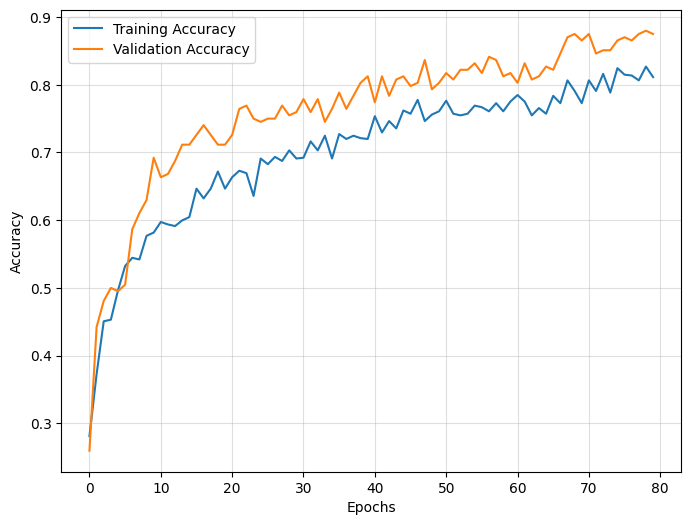

Training and Validation Loss


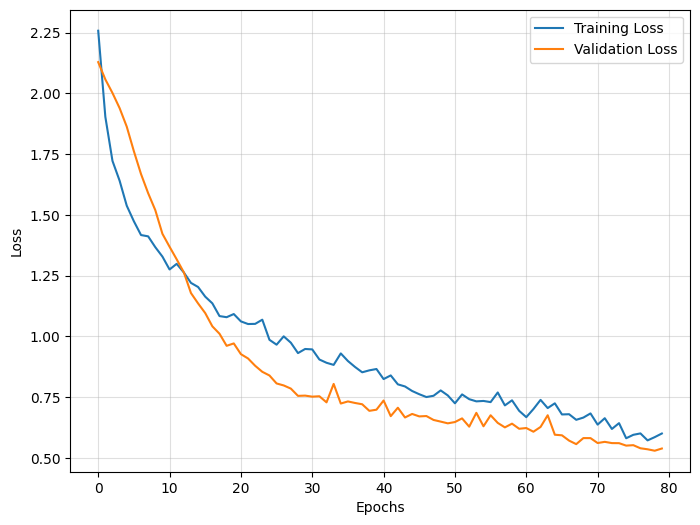

CHROMA_FIT_data_original


/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
44/44step - accuracy: 0.2013 - loss: 2.530834 2.5918 - accuracy: 0.1888 - loss: 2.574026/440s━━━━━━━━━6357━━━━━━━━━━━━━━━━━━━━ 0s━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4ms/step - accuracy: 0.1441 - loss: 2.6771 ━━━━━━━━━━━━━━━━━━ 0s  5ms/step - accuracy: 0.1390 - loss: 2.70930s0s 5ms/step - accuracy: 0.1393 - loss: 2.6969 6ms/step - accuracy: 0.1392 - loss:  25/44━━━━━━━━━━ 0s ━━━━━━━━━━ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5ms/step - accuracy: 0.1765 - loss: 2.6009━━━━━━━━━0s  ━━━━━━━━━━━━━━━━━━━━━ ━━━━━━━━━━━0s 5ms/step - accuracy: 0.1825 - loss: 2.574 5ms/step - accuracy: 0.1857 - loss: 2.574027/4429/44━━━━━━━━━━28/30/44    ━━━━━━━━━━━━━31/44━━━━━━━━━━━━━━━━━━━0s0s━━━━━━━━━━━━━  6ms/step - accuracy: 0.1983 - loss: 2.5472 5ms/step - accuracy: 0.1951 - loss: 2.5561━━━━━━━━  6ms/step - accuracy: 0.2041 - loss: 2.5308━━━━━━━ 0s━━━━━━ 32/33/44 35/440s0s 6ms/step - accuracy: 0.2068 - loss: 2.5234  ━━━━━━━━━━━━━━━ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  6ms/step - a

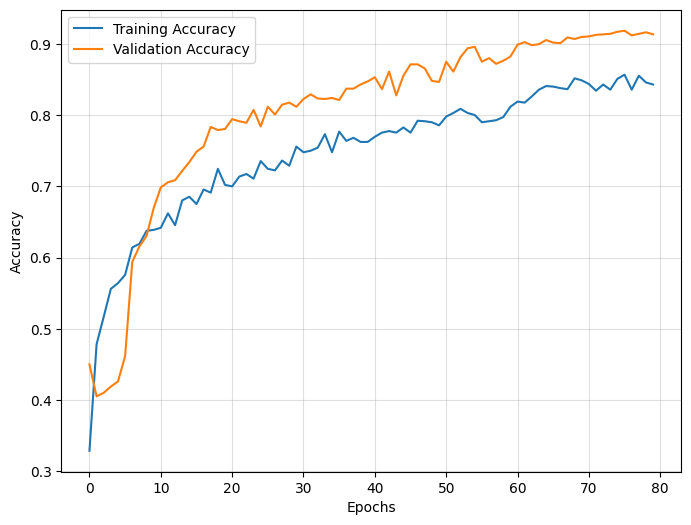

Training and Validation Loss


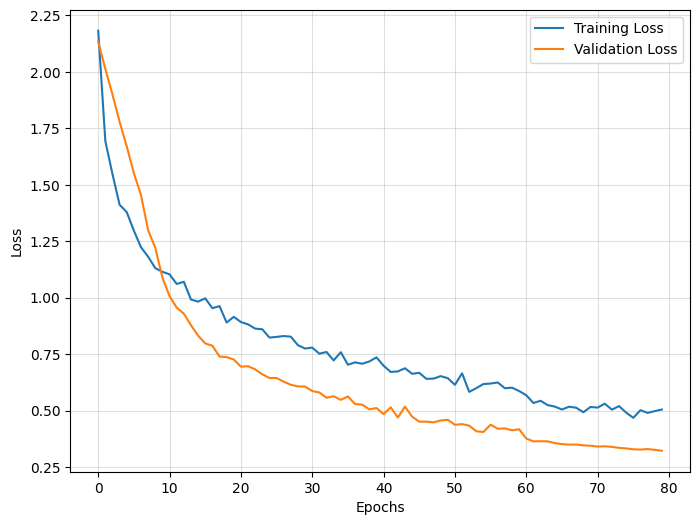

CHROMA_FIT_CSEC_data_original


/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
44/44 9ms/step - accuracy: 0.2036 - loss: 2.5135━━━  s: 2.4986 9ms/step - accuracy: 0.1956 - loss: 2.528542/4443/44━━━━━━━━━━━━━━━━━━━ ━━━━━━━━━━━━━━━━━━━━  0s━━━━━━━━━━━━━━━━━11/  6ms/step - accuracy: 0.0836 - loss: 2.8625 0s 12/44 ━━━━  5ms/step - accuracy: 0.0871 - loss: 2.8625 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s 15/4413/44━━━━━━ 6ms/step - accuracy: 0.0961 - loss: 2.8411   0s ━━━━━━━━━━━━━━━━━━━━━━━━━ 6ms/step - accuracy: 0.1040 - loss: 2.8190 00s  7ms/step - accuracy: 0.1164 - loss: 2.7764 7ms/step - accuracy: 0.1105 - loss: 2.7875━━━━━━━  7ms/step - accuracy: 0.1133 - loss: 2.787518/44━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━19/44   ━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1196 - loss: 2.7649 8ms/step - accuracy: 0.1230 - loss: 2.━━━━━━━━━━━━━━━━━━━23/44━━━━━━━━━━ 20/25/44━━━━━━━━━━0s24/44  ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  9ms/step - accuracy: 0.1384 - loss: 2.6817 9ms/step - accuracy: 0.1299 - loss: 2.73060s━━━━━━━━━26/44━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ ━━━━━━━━━━ 8ms/step - accur

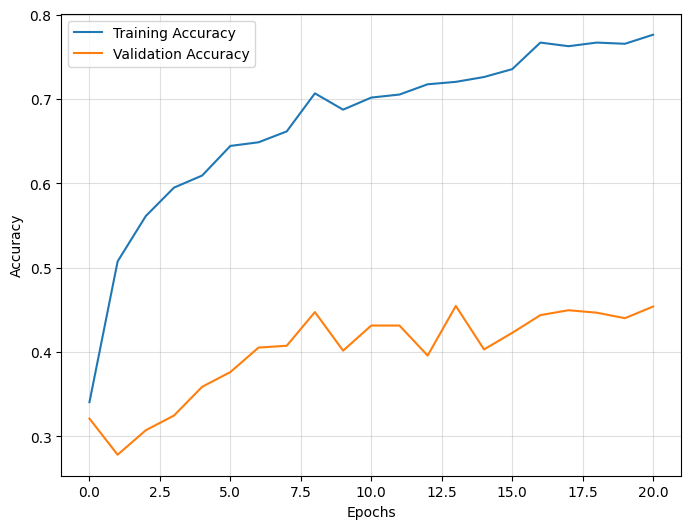

Training and Validation Loss


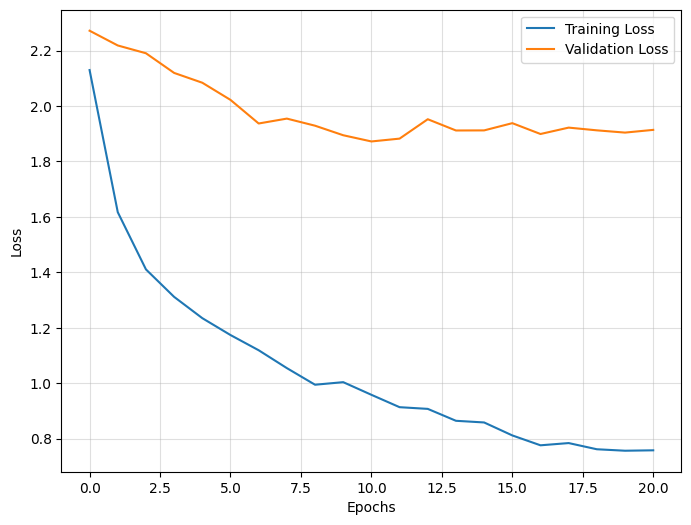

CHROMA_FIT_exposure_color_correction_data_original


/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
33/33━━━━━━━━━━━━━━31/33━━━━6 - loss: 2.431032/33━━━━━━━━━━━━━━━━━━━p - accuracy: 0.1094 - loss: 2.6735 3s/step - accuracy: 0.0625 - loss: 2.8122  5/33━━━━━━━━━━━━━━━━━━━ ━━ ━━━━━━━━━━━━━━━━━━━━━0s━━━━━━━━━━━━━━━━━  0s0s 6ms/step - accuracy: 0.1319 - loss: 2.5754 4ms/step - accuracy: 0.1419 - loss: 2.5754 6ms/step - accuracy: 0.1473 - loss: 2.57━━━━━━━15/3317/33━━━━━━━━━━━━━━━━━━━━━━━━━━━    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ ━━━━━━━━━━━  ━━━━━━━━━ 18/33 5ms/step - accuracy: 0.1798 - loss: 2.5219 5ms/step - accuracy: 0.1707 - loss: 2.5333 ━━━━━━━━━━0s  5ms/step - accuracy: 0.1753 - loss: 2.5219━━━━━━━━━━━ 0s0s━━━━━━━━━━ 6ms/step - accuracy: 0.1922 - loss: 2.4931 6ms/step - accuracy: 0.1838 - loss: 2.5122 ━━━━━━━━━━0s 6ms/step - accuracy: 0.1959 - loss: 2.421/33━━━━━━━━━━━━━━━━━━━━━━━ 6ms/step - accuracy: 0.1999 - loss: 2.476222/33  ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ ━━━━━  7ms/step - accuracy: 0.2030 - loss: 2.46290s  0s  7ms/step - accuracy: 0.2060 - loss: 2.4563━━━━━━━

/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

Results for CHROMA_FIT_exposure_color_correction_data_original saved to results/results_v3.2/CHROMA_FIT_exposure_color_correction_data_original.txt
Training and Validation Accuracy


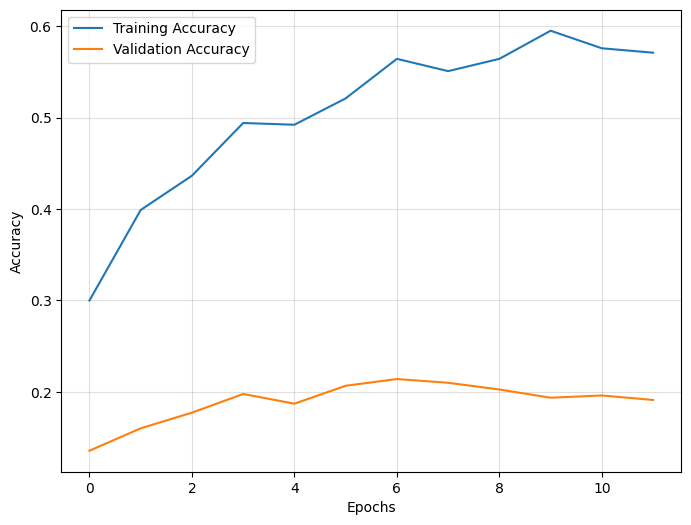

Training and Validation Loss


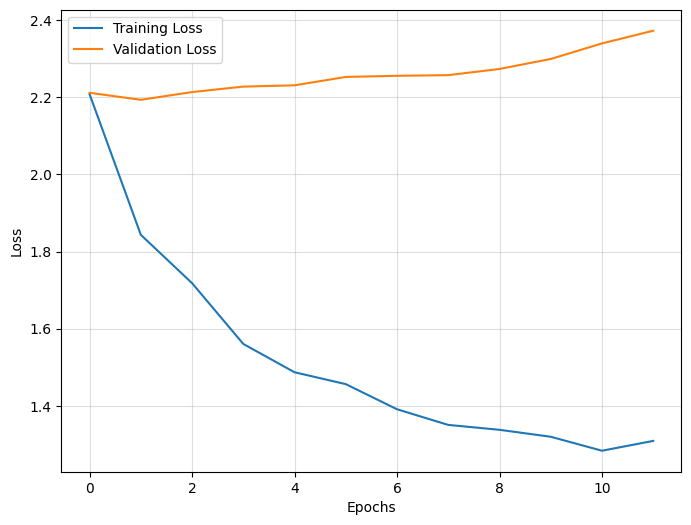

CHROMA_FIT_data_MST_original


/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
44/44━━━━━━━━━━━━━━43/4444/44  ━━━━━━━━━━━━━━/44/step - accuracy: 0.1188 - loss: 2.8854 ━━━━━━━ 4/44 7/440s 6/44    4ms/step - accuracy: 0.0938 - loss: 2.9884 ━ 0s━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4ms/step - accuracy: 0.0972 - loss: 2.966━━━━━━━━━━━━━━━━11/44 5ms/step - accuracy: 0.1081 - loss: 2.922310/440s12/440s  ━━━ 0s━━━━13/44 5ms/step - accuracy: 0.1148 - loss: 2.9059 ━━━━━ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━  15/44 14/440s ━━━━━━━━━━━━━━━━━━━━━━━━16/4417/44 0s  6ms/step - accuracy: 0.1323 - loss: 2.8170 6ms/step - accuracy: 0.1365 - loss: 2.8170 ━━━━━━━━━━━━━━  ━━━━━━ 6ms/step - accuracy: 0.1410 - loss: 2.7998━━━━━━━0s ━━━━━━━━━━━━━━━━━━━━ 0s━━━━━━━━━━━━━ 6ms/step - accuracy: 0.1449 - loss: 2.7843 6ms/step - accuracy: 0.1551 - loss: 2.73690s━━━━━━━━━━━━  7ms/step - accuracy: 0.1667 - loss: 2.6960 7ms/step - accuracy: 0.1588 - loss: 2.736919/44 ━━━━━━27/440s ━━━━━━━━━━━  7ms/step - accuracy: 0.1748 - loss: 2.6690  0s ━━━━━━━━━━━━━━━━━━━━ ━━━━━━━━━━

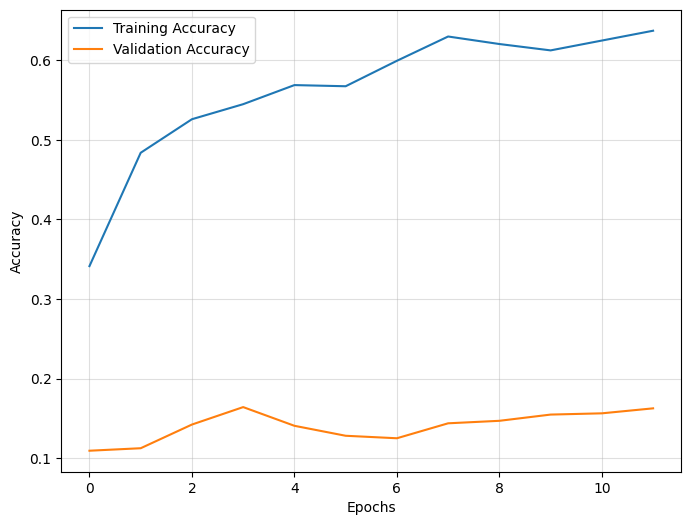

Training and Validation Loss


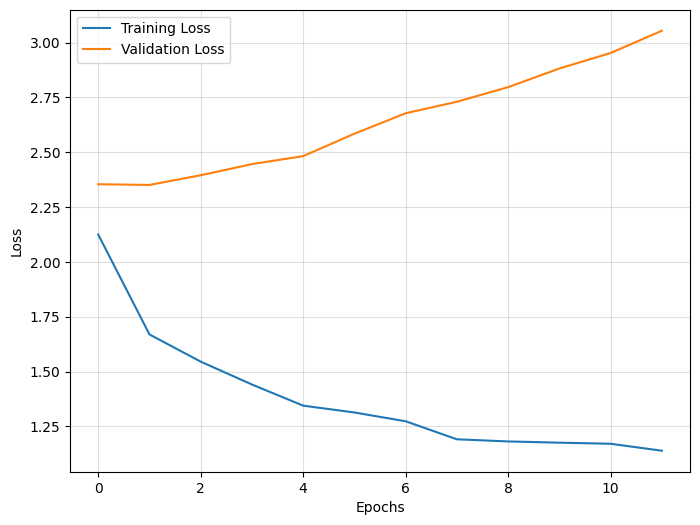

CHROMA_FIT_CSEC_data_MST_original


/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
44/44━━━━━━━━━━━━━━0s40/44━━━━━━━━━━━━━━━━━35/440s━━━━628/44 oss: 2.9115   ━━━━━━━━━━━━━━━━━━━ ━0s  3ms/step - accuracy: 0.0000e+00 - loss: 2.95180s 4ms/step - accuracy: 0.0104 - loss: 2.9784━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0176 - loss: 2.9━━━━━━━━━━━━━━ 11/44 ━━━━0s━━━━━━━━━━━━━━━━ 8ms/step - accuracy: 0.0621 - loss: 2.8271  8ms/step - accuracy: 0.0709 - loss: 2.8040 ━━━━━━━━━━━━━━━13/44 ━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0805 - loss: 2.7387━━━━━━━━━━━━15/44 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  0s0s  7ms/step - accuracy: 0.1023 - loss: 2.7206━━━━━━━━━━━━━━━━━━━━0s 7ms/step - accuracy: 0.0957 - loss: 2.7 7ms/step - accuracy: 0.1084 - loss: 2.7035━━━━━━━━━━ ━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0s26/44 7ms/step - accuracy: 0.1456 - loss: 2.573625/4427/44━━━━━━━━━━  7ms/step - accuracy: 0.1494 - loss: 2.5736━━━━━━━━━━  ━━━━━━━━━━━━━━━━━━━━━ 0s━━━━━━━━━━━━━━━━━━━━━━━━0s 30/440s 29/44━━━━━━━━ 0s  7ms/step - accuracy: 0.1574 - loss: 2.5417  7ms/step - accuracy: 0.1613 - loss: 2.

/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

Results for CHROMA_FIT_CSEC_data_MST_original saved to results/results_v3.2/CHROMA_FIT_CSEC_data_MST_original.txt
Training and Validation Accuracy


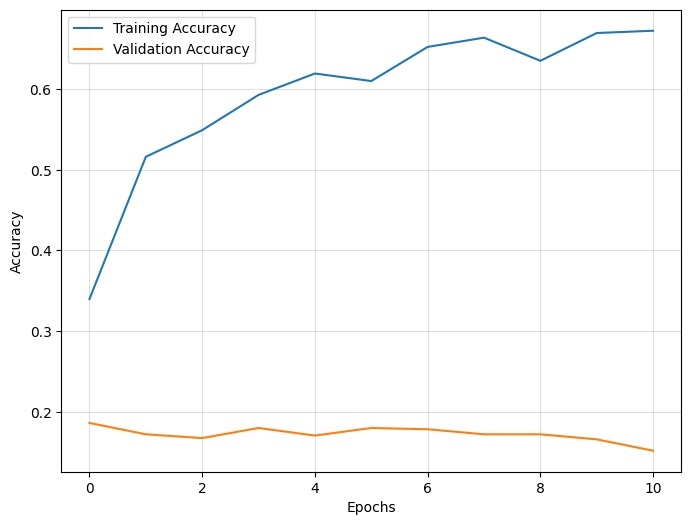

Training and Validation Loss


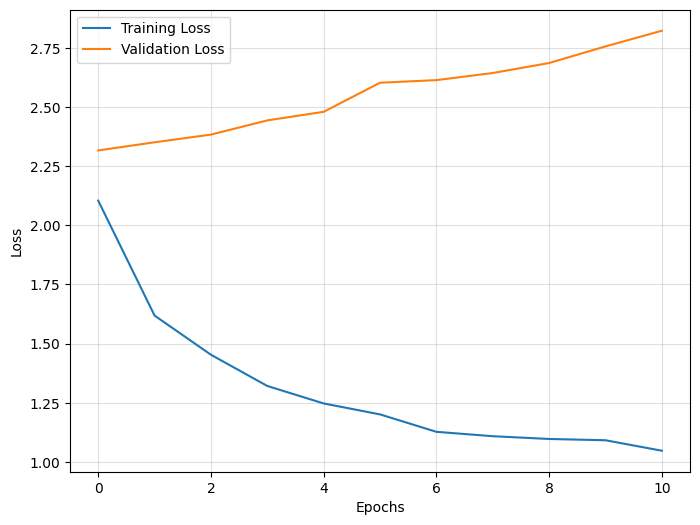

CHROMA_FIT_exposure_color_correction_data_MST_original


/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
33/3333━━━━━━━━━━━━━━━━━━━━7 - loss: 2.491930/33step - accuracy: 0.2305 - loss: 2.4919 loss: 2.7791 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  0s 2ms/step - accuracy: 0.1172 - loss: 3.0034━━━━━━━━━━━━━━━━━ 6/330s  4ms/step - accuracy: 0.1354 - loss: 2.8939  8/33━━━ 3ms/step - accuracy: 0.1233 - loss: 2.8939010/33  4ms/step - accuracy: 0.1458 - loss: 2.8579 7/33━━━━━━━━━━━━━━━━━━━  5ms/step - accuracy: 0.1536 - loss: 2.7957━━━━━━━━━━━━━━━━ ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━0s13/330s━━━━━━━━━━━━━━  7ms/step - accuracy: 0.1621 - loss: 2.7640   5ms/step - accuracy: 0.1611 - loss: 2.7791   0s0s ━━━━━━━━━━━━━━━━━━━━━━━━━━━14/33  6ms/step - accuracy: 0.1678 - loss: 2.7220s0s15/33━━━━━━━━ 6ms/step - accuracy: 0.1701 - loss: 217/330s16/33━━━━━━━━━ 7ms/step - accuracy: 0.1762 - loss: 2.6943 ━━━━━━━━━━━━━━━━━━21/33━━━━━━━━━━━20/33━━━━━━━━━━━━━━━━━━━━━━0s    ━━━━━━━━━0s ━━━━━━━━━━━━━━━━━━━━━━━━ ━━━━━━━━ 7ms/step - accuracy: 0.1793 - loss: 2.68100s 7ms/step - accuracy: 0.1893 - loss: 2.6419━

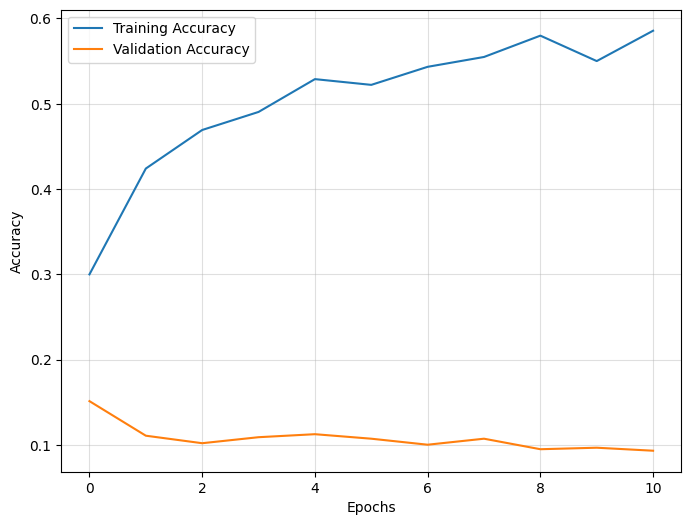

Training and Validation Loss


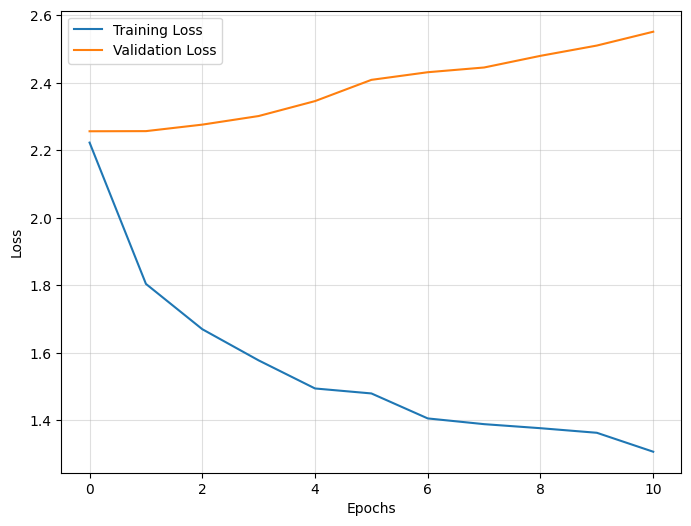

CHROMA_FIT_data_MST


/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
44/44444/44  ━━━━━ccuracy: 0.2091 - loss: 2.5325step - accuracy: 0.2112 - loss: 2.5325 34/44 9ms/step - accuracy: 0.1883 - loss: 2.63295ms/step - accuracy: 0.0538 - loss: 3.3068 6ms/step - accuracy: 0.0391 - loss: 3.3586 ━━━━━━━━━━━━━━━━━━━ 6ms/step - accuracy: 0.0638 - loss: 3.2133 10/44 9━━━━ ━━━━12/44━━━━━━━━━━━━━━━━━━━━━ ━━━━━━━━━━━━━━ 16/440s0s  13/44━━━━━━━━━━━━━━━━━━━━━0s  7ms/step - accuracy: 0.0889 - loss: 3.0433  7ms/step - accuracy: 0.0836 - loss: 3.0748━━━━━━━━━━━━━━━━━━━━ 7ms/step - accuracy: 0.0951 - loss: 3.0115 ━━━━━0s ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6ms/step - accuracy: 0.1013 - loss: 2.98130s━━━━━━━━━━━━━0s1━━━━━━━━━━━━17/440s ━━━━━━━━21/44 7ms/step - accuracy: 0.1079 - loss: 2.9258 ━━━━━━━━━━━━ 6ms/step - accuracy: 0.1248 - loss: 2.8781━━━━━━━━━   7ms/step - accuracy: 0.1392 - loss: 2.8183 22/44 0s ━━━━━━━━━━━━━23/44 ━━━━━━━━━━━ 8ms/step - accuracy: 0.1345 - loss: 2.8183━━━━━━━━━━ ━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1435 - loss: 2.80100s0s━━━━━━━━  8

/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

Results for CHROMA_FIT_data_MST saved to results/results_v3.2/CHROMA_FIT_data_MST.txt
Training and Validation Accuracy


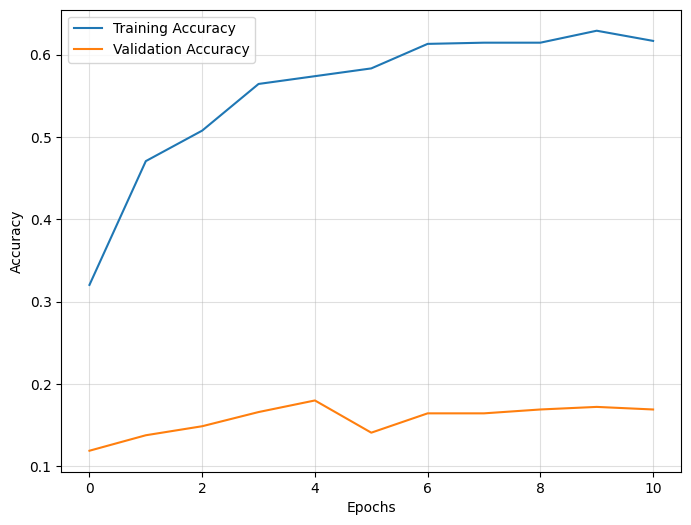

Training and Validation Loss


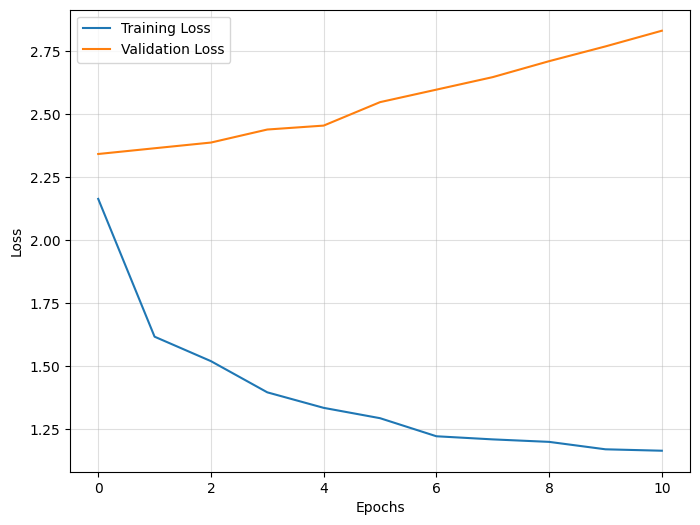

CHROMA_FIT_CSEC_data_MST


/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
44/44/step - accuracy: 0.2228 - loss: 2.533339/440s - loss: 2.5664━━━━━ 44 7ms/step - accuracy: 0.1342 - loss: 2.8305 0s━━━━━━━━━━━━━━━━━━━   2ms/step - accuracy: 0.0938 - loss: 2.9502━━ 7/44  4ms/step - accuracy: 0.1087 - loss: 2.8959 4ms/step - accuracy: 0.1007 - loss: 2.9170 8/44━━━━━━━━━━━━━━━━━━━━━  ━━━━━━━━━━━━━━━━ 6ms/step - accuracy: 0.1207 - loss: 2.8722 0s   9/44 5ms/step - accuracy: 0.1157 - loss: 2.8884 0s━━━━ 6ms/step - accuracy: 0.1245 - loss: 2.8722━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━11/44━━━━━━━━━━━━━━━━━━━━━0s13/440 7ms/step - accuracy: 0.1437 - loss: 2.7974    ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━0s ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8ms/step - accuracy: 0.1393 - loss: 2.79740s  8ms/step - accuracy: 0.1480 - loss: 2.  0s 8ms/step - accuracy: 0.1609 - loss: 2.740620/44 8ms/step - accuracy: 0.1523 - loss: 2.7691 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  0s━━━━━━━━━━ 8ms/step - accuracy: 0.1643 - loss: 2.7044━━━━━━━━━━  ━━━━━━━━━━━━━━━━━━ 0s━━━━━━━━━━━0s 0

/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

Results for CHROMA_FIT_CSEC_data_MST saved to results/results_v3.2/CHROMA_FIT_CSEC_data_MST.txt
Training and Validation Accuracy


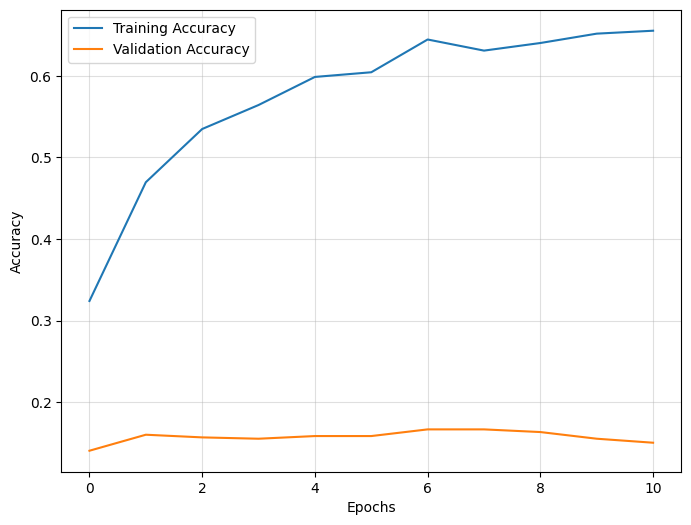

Training and Validation Loss


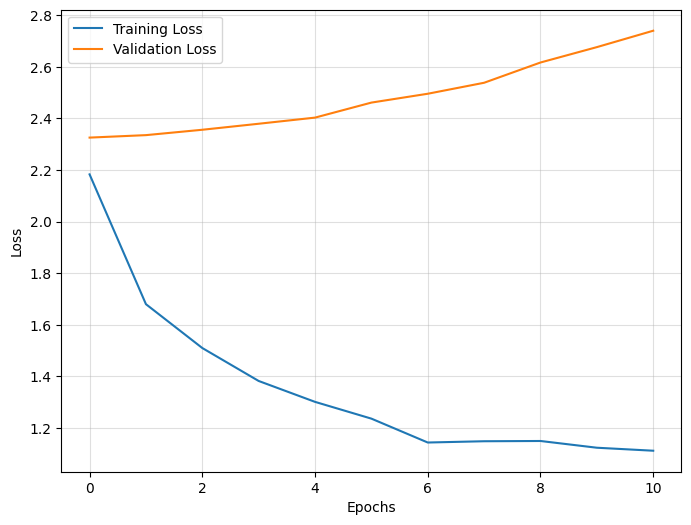

CHROMA_FIT_exposure_color_correction_data_MST


/home/dasec-notebook/Thesis/skin_tone_estimation/.conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
33/3331/33━━━━ 8ms/step - accuracy: 0.1931 - loss: 2.5016 28/33━━━━━━━━━━━━━━━━88 - loss: 2.57060s━━━━━━━━━━━━━━━━━accuracy: 0.0781 - loss: 2.7273━━━━━━━━━━━━━━━━━━ 8/33 7/33 6/33━━    ━━━━10/33━━━━━━━━━━━━━━━━0s━━━━━━  5ms/step - accuracy: 0.0923 - loss: 2.661912/33━━━━━━  0s  0s 6ms/step - accuracy: 0.1147 - loss: 2.6135 ━━━━━━━━━━━━━━━━━━━━━━━━━━━13/33   6ms/step - accuracy: 0.1399 - loss: 2.5976 0s15/3314/33 6ms/step - accuracy: 0.1471 - loss: 2.5783 ━━━━━━━ 6ms/step - accuracy: 0.1533 - loss: 2.5783 16/━━━━━━━━━━━━━━━━━━━━━━  17/33━━━━━━━━━━━━━━━━━━━0s━━━━━━━━━ ━━━━━━━━━━━━ ━━━━━━━━━━018/3320/3319/33  8ms/step - accuracy: 0.1638 - loss: 2.5448   0s0s  7ms/step - accuracy: 0.1794 - loss: 2.5358 7ms/step - accuracy: 0.1746 - loss: 2.5448━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  7ms/step - accuracy: 0.1900 - loss: 2.5140 0s23/  ━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27/━━━━━━━  0s━━━━0s━━━━━━━━━━━━━━━ 8ms/step - accuracy: 0.2022 - loss: 2.4818━━━━━  8ms/step - accuracy: 0.1

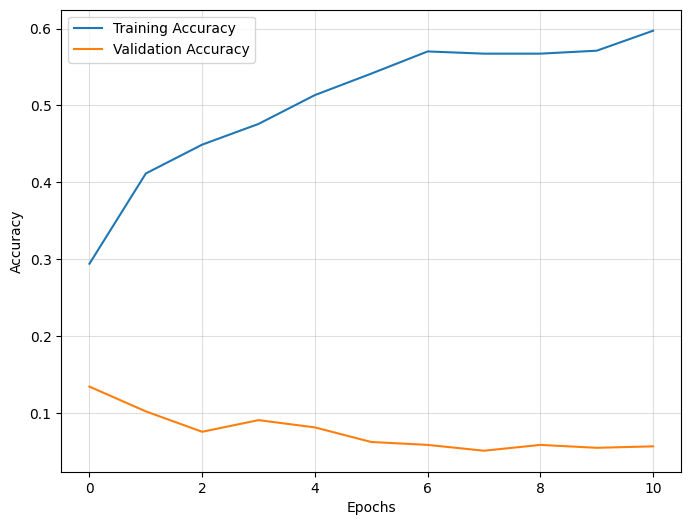

Training and Validation Loss


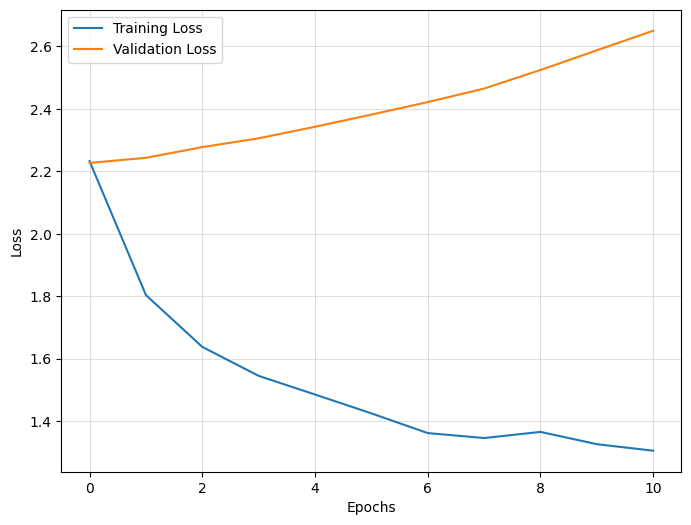

In [18]:
for experiment in all_data:

    print(experiment)

    output_file = f"{save_resuts_folder}/{experiment}.txt"

    X_train, X_test, y_train, y_test, num_classes = all_data[experiment]

    model, history = multiclass_regression_utils.model_training(X_train, X_test, y_train, y_test, num_classes, experiment, output_file)

    multiclass_regression_utils.plot_training_history(experiment, history, save_resuts_folder)

    

PCA

CHROMA_FIT_data


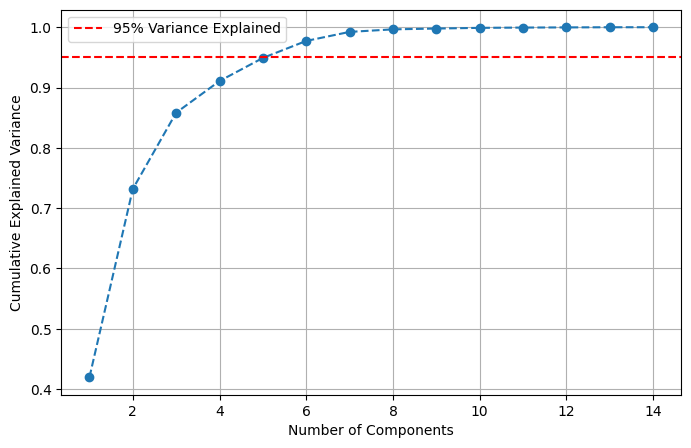

Number of components for 95% variance explained: 6
[0.41972683 0.73187872 0.8582778  0.91077628 0.94907331 0.97727976]


ValueError: 'c' argument has 7576 elements, which is inconsistent with 'x' and 'y' with size 947.

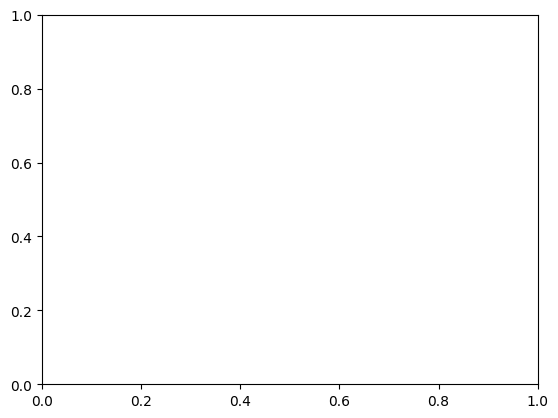

Remove the outliers

In [253]:
import numpy as np
from scipy.stats import zscore

# Assuming X is your feature matrix (2D array)
# Calculate Z-scores for each feature (column)
z_scores = np.abs(zscore(X))

# Define a threshold for detecting outliers
threshold = 3

# Find rows (samples) where any feature has a Z-score greater than the threshold
outliers = np.where(z_scores > threshold)

# Get the indices of the outliers (rows with any outlier)
outlier_indices = np.unique(outliers[0])  # unique rows with outliers

# Remove outliers from the feature matrix X and the target matrix y
X = np.delete(X, outlier_indices, axis=0)
y = np.delete(y, outlier_indices, axis=0)

print(f"Outliers detected: {len(outlier_indices)}")
print(f"Remaining samples: {X.shape[0]}")

# -----------------------------------------------------


# from sklearn.ensemble import IsolationForest

# # Initialize the Isolation Forest model
# isolation_forest = IsolationForest(contamination=0.1, random_state=42)

# # Fit the model and predict outliers (-1 is outlier, 1 is inlier)
# outliers = isolation_forest.fit_predict(X)

# # Get indices of the outliers
# outlier_indices = np.where(outliers == -1)[0]

# # Remove outliers from X and y
# X_no_outliers = np.delete(X, outlier_indices, axis=0)
# y_no_outliers = np.delete(y, outlier_indices, axis=0)

# print(f"Outliers detected: {len(outlier_indices)}")
# print(f"Remaining samples: {X_no_outliers.shape[0]}")

# -----------------------------------------------------

# Function to detect and remove outliers based on IQR
# def detect_outliers_iqr(X):
#     # Calculate Q1 (25th percentile) and Q3 (75th percentile)
#     Q1 = np.percentile(X, 25, axis=0)
#     Q3 = np.percentile(X, 75, axis=0)
    
#     # Calculate the IQR (Interquartile Range)
#     IQR = Q3 - Q1
    
#     # Define the outlier bounds (1.5 times IQR rule)
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Find rows where any feature is outside the outlier bounds
#     outliers = np.any((X < lower_bound) | (X > upper_bound), axis=1)
    
#     # Get the indices of the outliers
#     outlier_indices = np.where(outliers)[0]
    
#     # Remove outliers from X and y
#     X_no_outliers = np.delete(X, outlier_indices, axis=0)
#     y_no_outliers = np.delete(y, outlier_indices, axis=0)
    
#     print(f"Outliers detected: {len(outlier_indices)}")
#     print(f"Remaining samples: {X_no_outliers.shape[0]}")
    
#     return X_no_outliers, y_no_outliers

# # Apply IQR method to detect and remove outliers
# X, y = detect_outliers_iqr(X)

# -----------------------------------------





Outliers detected: 16
Remaining samples: 302


In [254]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# pca = PCA(n_components=0.95)  # Retain 95% of variance
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)




# poly = PolynomialFeatures(degree=2)
# X_train = poly.fit_transform(X_train)
# X_test = poly.transform(X_test)



In [262]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBRegressor

# Define the model
# model = SVC(kernel='rbf', random_state=42, class_weight='balanced')
# model = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# rf = RandomForestRegressor(random_state=42)
# svr = SVR()
# ridge = Ridge()
# model = MultiOutputRegressor(VotingRegressor(estimators=[('rf', rf), ('svr', svr), ('ridge', ridge)]))

# svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)
# model = MultiOutputRegressor(svr)

# model = MultiOutputRegressor(HistGradientBoostingRegressor(random_state=42))
# model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', random_state=42))

model = MultiOutputRegressor(RandomForestRegressor(n_estimators=10, max_depth=None, random_state=42))

# model = MultiOutputClassifier(BalancedRandomForestClassifier(random_state=42))

# # Define the hyperparameters grid
# param_grid = {
#     'estimator__n_estimators': [100, 200, 300],
#     'estimator__max_depth': [10, 20, None],
#     'estimator__min_samples_split': [2, 5, 10],
#     'estimator__min_samples_leaf': [1, 2, 4],
#     'estimator__max_features': ['auto', 'sqrt', 'log2']
# }
# # Best parameters: {'estimator__max_depth': 20, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 200}

# # Perform GridSearchCV to find the best hyperparameters
# grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Print the best parameters found
# print(f"Best parameters: {grid_search.best_params_}")

# # Use the best model found by GridSearchCV
# model = grid_search.best_estimator_

# Train the best model
model.fit(X_train, y_train)


# model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dense(y_train.shape[1])  # One neuron per output
# ])
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred = model.predict(X_test)


In [263]:
# Define the model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [264]:
formatted_y_true, formatted_y_pred = multiclass_regression_utils.RGB_predictions_to_MST(y_test, y_pred)

multiclass_regression_utils.accuracy_score_MST(formatted_y_true, formatted_y_pred)
print(formatted_y_true)
print(formatted_y_pred)
print(y_pred)

Exact Match Accuracy: 16.39%
±1 Match Accuracy: 44.26%
±2 Match Accuracy: 77.05%
[2, 6, 4, 2, 8, 2, 2, 7, 2, 2, 2, 2, 2, 7, 3, 2, 2, 2, 4, 2, 2, 7, 6, 2, 6, 2, 2, 7, 2, 2, 1, 2, 2, 4, 6, 3, 2, 4, 6, 2, 2, 2, 4, 2, 2, 6, 2, 2, 2, 2, 6, 8, 6, 3, 5, 4, 2, 2, 2, 2, 5]
[4, 4, 4, 4, 5, 3, 3, 4, 4, 4, 4, 4, 1, 4, 2, 4, 2, 2, 1, 3, 2, 3, 2, 1, 1, 4, 4, 4, 1, 3, 3, 4, 3, 1, 4, 4, 2, 4, 4, 1, 2, 3, 3, 6, 3, 2, 2, 2, 3, 4, 4, 4, 1, 1, 1, 2, 2, 4, 4, 1, 4]
[[228.05 210.89 193.25]
 [224.4  202.98 182.89]
 [225.77 208.58 194.46]
 [228.07 208.08 180.63]
 [160.55 128.31  85.12]
 [238.59 223.8  204.09]
 [235.39 221.98 196.34]
 [220.82 202.4  183.77]
 [187.7  166.73 153.98]
 [227.57 207.56 190.65]
 [233.42 215.3  196.13]
 [230.62 216.65 199.07]
 [193.81 185.09 168.49]
 [150.87 114.56  78.95]
 [215.78 195.85 167.97]
 [229.37 212.03 183.29]
 [169.6  145.79 127.77]
 [236.49 225.68 207.61]
 [216.89 198.41 176.78]
 [232.11 218.27 199.9 ]
 [232.78 222.43 205.52]
 [211.95 194.65 153.98]
 [203.58 184.53 158.31]

       Feature  Importance
0    Feature 2    0.256740
1    Feature 5    0.154882
2    Feature 3    0.106107
3   Feature 12    0.080702
4   Feature 13    0.059800
5    Feature 0    0.055491
6    Feature 9    0.049830
7    Feature 1    0.041539
8    Feature 6    0.040061
9    Feature 4    0.039997
10   Feature 8    0.038165
11  Feature 11    0.031092
12   Feature 7    0.023095
13  Feature 10    0.022499


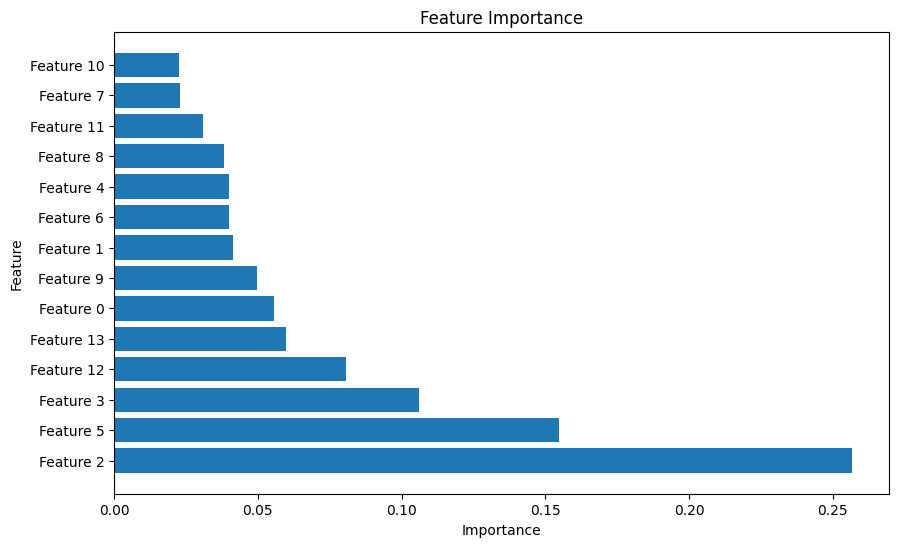

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [258]:

# Access feature importance
# For MultiOutputRegressor, we get feature importance for each estimator (regressor)
importances = model.estimators_[0].feature_importances_

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]

# Get feature names (assuming you have column names)
feature_names = [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({
    'Feature': np.array(feature_names)[sorted_idx],
    'Importance': importances[sorted_idx]
})

# Display feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

# Optional: Remove features with low importance (e.g., importance < threshold)
threshold = 0.05  # You can set your own threshold for "low" importance
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']
X_train_selected = X_train[:, np.isin(feature_names, important_features)]
X_test_selected = X_test[:, np.isin(feature_names, important_features)]

# Train the model again with only important features
model.fit(X_train_selected, y_train)

In [259]:
# Make predictions
y_pred = model.predict(X_test_selected)

formatted_y_true, formatted_y_pred = multiclass_regression_utils.RGB_predictions_to_MST(y_test, y_pred)

multiclass_regression_utils.accuracy_score_MST(formatted_y_true, formatted_y_pred)

Exact Match Accuracy: 14.75%
±1 Match Accuracy: 39.34%
±2 Match Accuracy: 80.33%


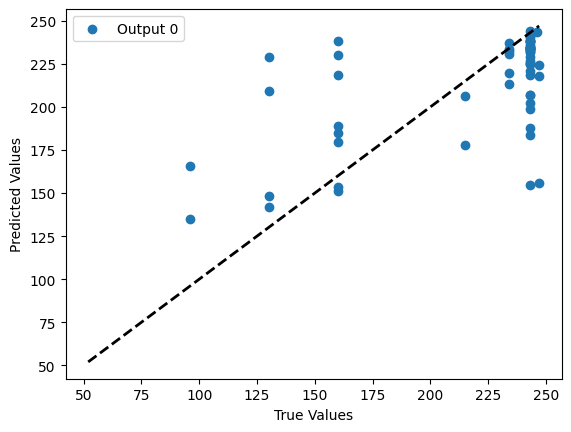

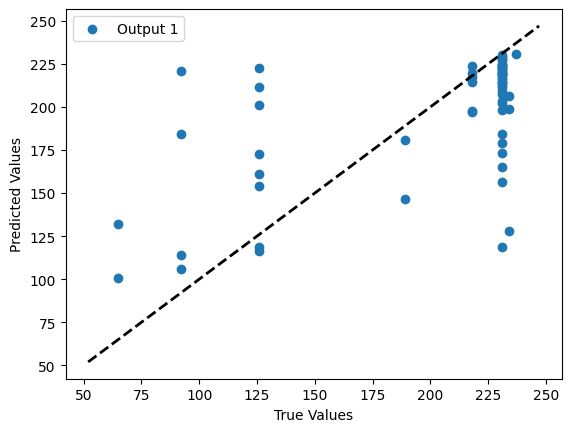

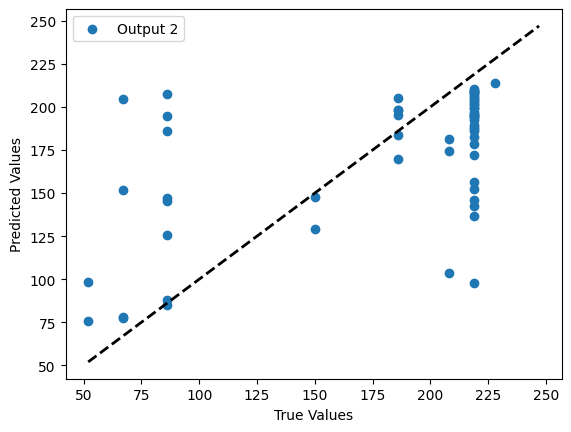

In [260]:
import matplotlib.pyplot as plt

for i in range(y_test.shape[1]):
    plt.scatter(y_test[:, i], y_pred[:, i], label=f'Output {i}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()


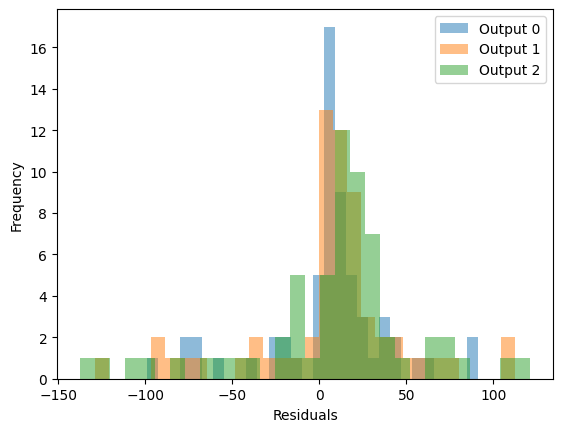

In [261]:
residuals = y_test - y_pred
for i in range(residuals.shape[1]):
    plt.hist(residuals[:, i], bins=30, alpha=0.5, label=f'Output {i}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()
